In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
kolom = ['Nama Sungai','Kelas','pH','DO','BOD','COD','TSS','Nitrat','Fosfat','Fecal Coliform']
KualitasAir = pd.read_excel("D:\\KP(Running)\\Rekap 2024Pangkling.xlsx",usecols=kolom)
KualitasAir

,Nama Sungai,Kelas,pH,DO,BOD,COD,TSS,Nitrat,Fosfat,Fecal Coliform
0,Saluran Primer Kalibokor,4,6.95,4.8,16,48.2,156.0,0.170,0.190,200
1,Saluran Primer Kali Sumo,4,6.92,4.5,13,39.1,26.0,0.010,3.840,500
2,Saluran Dinoyo di Rumah Pompa Dinoyo,4,7.16,4.0,34,99.8,37.0,0.110,2.870,260
3,Saluran Darmo di Rumah Pompa Darmokali,4,6.87,3.1,14,44.4,37.0,0.380,2.140,400
4,Kali Pegirian di Jl. Undaan,4,6.87,3.1,7,20.9,27.5,1.430,1.030,400
...,...,...,...,...,...,...,...,...,...,...
171,saluran wonorejo - wonokromo di Jembatan kedun...,4,7.85,3.9,17,67.0,34.0,0.033,0.059,410
172,Kali Wonokromo di Jembatan Merr,3,7.92,4.0,16,65.0,50.0,0.330,0.050,370
173,kali wonokromo jembatan nginden,3,7.97,4.2,17,18.0,48.0,0.140,0.050,400
174,sal. kebon agung di jl. rungkut industri,3,7.72,3.6,18,66.0,12.0,0.018,0.057,110


# PreProcessing

In [4]:
KualitasAir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Sungai     176 non-null    object 
 1   Kelas           176 non-null    int64  
 2   pH              176 non-null    float64
 3   DO              176 non-null    float64
 4   BOD             176 non-null    int64  
 5   COD             176 non-null    float64
 6   TSS             176 non-null    float64
 7   Nitrat          176 non-null    float64
 8   Fosfat          176 non-null    float64
 9   Fecal Coliform  176 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 13.9+ KB


In [5]:
parameter = KualitasAir.select_dtypes(include=['number'])
parameter

,Kelas,pH,DO,BOD,COD,TSS,Nitrat,Fosfat,Fecal Coliform
0,4,6.95,4.8,16,48.2,156.0,0.170,0.190,200
1,4,6.92,4.5,13,39.1,26.0,0.010,3.840,500
2,4,7.16,4.0,34,99.8,37.0,0.110,2.870,260
3,4,6.87,3.1,14,44.4,37.0,0.380,2.140,400
4,4,6.87,3.1,7,20.9,27.5,1.430,1.030,400
...,...,...,...,...,...,...,...,...,...
171,4,7.85,3.9,17,67.0,34.0,0.033,0.059,410
172,3,7.92,4.0,16,65.0,50.0,0.330,0.050,370
173,3,7.97,4.2,17,18.0,48.0,0.140,0.050,400
174,3,7.72,3.6,18,66.0,12.0,0.018,0.057,110


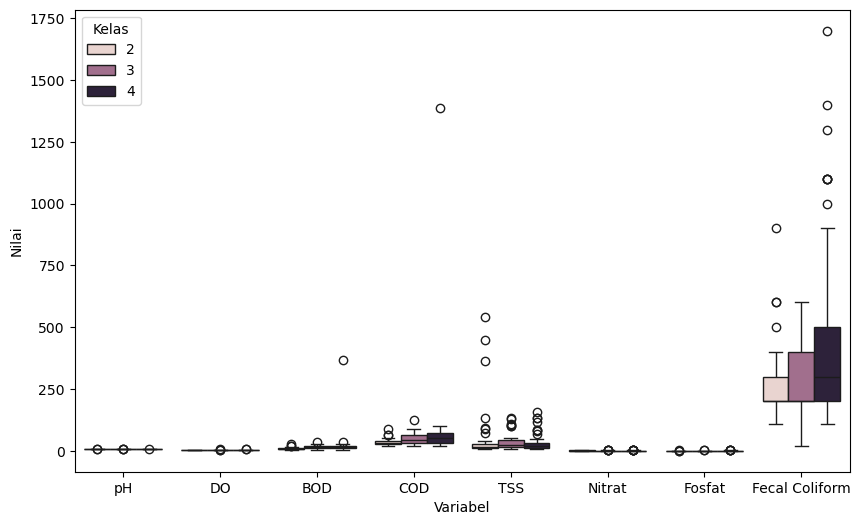

In [10]:
#Pengecekan Outlier Tiap Parameter Berdasarkan Kelas#
parameterS=parameter.melt(id_vars='Kelas',var_name='Variabel',value_name='Nilai')
plt.figure(figsize=(10,6))
sns.boxplot(x='Variabel',y='Nilai',hue='Kelas', data=parameterS)
plt.show()

In [16]:
pd.set_option('display.max_rows', None)
KualitasAir['Nama Sungai'].value_counts().sort_index()

Nama Sungai
Boezem Kalidami                                                3
Boezem Kedurus                                                 6
Boezem Morokrembangan                                          3
Boezem Wonorejo                                                5
Kali Banyuurip di Rumah Pompa Gunungsari                       4
Kali Greges di Jembatan Jl. Dupak                              3
Kali Greges di Jl. Dupak                                       1
Kali Jeblokan di Petojo                                        1
Kali Kandangan di Tb. Osowilangun                              3
Kali Kebonagung di Jl. Rungkut Industri                        2
Kali Krembangan di Jl. Kalianak                                4
Kali Mas di Jembatan Keputran Selatan                          1
Kali Mas di Jembatan Ngagel                                    1
Kali Pegirian di Jl. Pegirian                                  2
Kali Pegirian di Jl. Undaan                                    4
Kali Sememi  

In [17]:
KualitasAir['Nama Sungai'] = KualitasAir['Nama Sungai'].replace({'Kali Greges di Jl. Dupak':'Kali Greges di Jembatan Jl. Dupak',
                                                                'Kali Surabaya Intake PDAM Karangpilang':'Kali Surabaya di Intake PDAM Karangpilang',
                                                                'Kali Surabaya di Perbatasan SBY - Gresik':'Kali Surabaya di Perbatasan Sby - Gresik',
                                                                'Kali Wonokromo di Jembatan Nginden':'Kali Wonokromo di Jembatan Jl. Nginden',
                                                                'Kalimas di PJT Kayoon':'Kalimas di PJT Kayun',
                                                                'Sal. Kenari di Rumah Pompa Kenari':'Saluran Kenari di Rumah Pompa Kenari',
                                                                'Sal. Primer Medokan Ayu':'Saluran Primer Medokan Ayu',
                                                                'Saluran Jeblokan di Petojo':'Kali Jeblokan di Petojo',
                                                                'Saluran Jeblokan di Jl. Petojo':'Kali Jeblokan di Petojo',
                                                                'Saluran Wonorejo - Wonocolo di Jembatan Kedung Baruk Utara':'saluran wonorejo - wonokromo di Jembatan kedung baruk utara',
                                                                'Saluran Pegirian di Jl. Undaan':'Kali Pegirian di Jl. Undaan',
                                                                'kali Pegirian di Jl. Undaan':'Kali Pegirian di Jl. Undaan',
                                                                'kali wonokromo jembatan nginden':'Kali Wonokromo di Jembatan Jl. Nginden',
                                                                'sal. kebon agung di jl. rungkut industri':'Kali Kebonagung di Jl. Rungkut Industri',
                                                                'Saluran Kebonagung di Jl. Rungkut Industri':'Kali Kebonagung di Jl. Rungkut Industri',
                                                                'Saluran Krembangan di Jl. Kalianak':'Kali Krembangan di Jl. Kalianak',
                                                                'kali surabaya  jembatan wonokromo':'Kali Surabaya di Jembatan Wonokromo',
                                                                'kali wonokromo jembatan nginden':'Kali Wonokromo di Jembatan Jl. Nginden',
                                                                'Saluran Medokan Ayu':'Saluran Primer Medokan Ayu',
                                                                'saluran primer medokan ayu':'Saluran Primer Medokan Ayu',
                                                                'saluran primer medokan semampir':'Saluran Primer Medokan Semampir'
                                                                })

In [18]:
KualitasAir['Nama Sungai'].value_counts().sort_index()

Nama Sungai
Boezem Kalidami                                                3
Boezem Kedurus                                                 6
Boezem Morokrembangan                                          3
Boezem Wonorejo                                                5
Kali Banyuurip di Rumah Pompa Gunungsari                       4
Kali Greges di Jembatan Jl. Dupak                              4
Kali Jeblokan di Petojo                                        5
Kali Kandangan di Tb. Osowilangun                              3
Kali Kebonagung di Jl. Rungkut Industri                        6
Kali Krembangan di Jl. Kalianak                                5
Kali Mas di Jembatan Keputran Selatan                          1
Kali Mas di Jembatan Ngagel                                    1
Kali Pegirian di Jl. Pegirian                                  2
Kali Pegirian di Jl. Undaan                                    6
Kali Sememi                                                    3
Kali Simo    

In [19]:
KualitasAir['Nama Sungai'] = KualitasAir['Nama Sungai'].replace({'Kalimas di Jembatan Kebonrojo':'Kali Mas di Jembatan Kebonrojo',
                                                                 'Kalimas di Jembatan Keputran':'Kali Mas di Jembatan Keputran Selatan',
                                                                 'Kalimas di Jembatan Keputran Selatan':'Kali Mas di Jembatan Keputran Selatan',
                                                                 'Kalimas di Jembatan Ngagel':'Kali Mas di Jembatan Ngagel',
                                                                 'Sal. Primer Kalidami di Jembatan Jl. Dharmahusada':'Kalidami di Jembatan Jl. Dharmahusada'})

In [20]:
lokasi = pd.DataFrame(KualitasAir['Nama Sungai'].value_counts().sort_index()).reset_index()
lokasi.columns=['Nama Sungai','Jumlah Data']
lokasi

,Nama Sungai,Jumlah Data
0,Boezem Kalidami,3
1,Boezem Kedurus,6
2,Boezem Morokrembangan,3
3,Boezem Wonorejo,5
4,Kali Banyuurip di Rumah Pompa Gunungsari,4
5,Kali Greges di Jembatan Jl. Dupak,4
6,Kali Jeblokan di Petojo,5
7,Kali Kandangan di Tb. Osowilangun,3
8,Kali Kebonagung di Jl. Rungkut Industri,6
9,Kali Krembangan di Jl. Kalianak,5


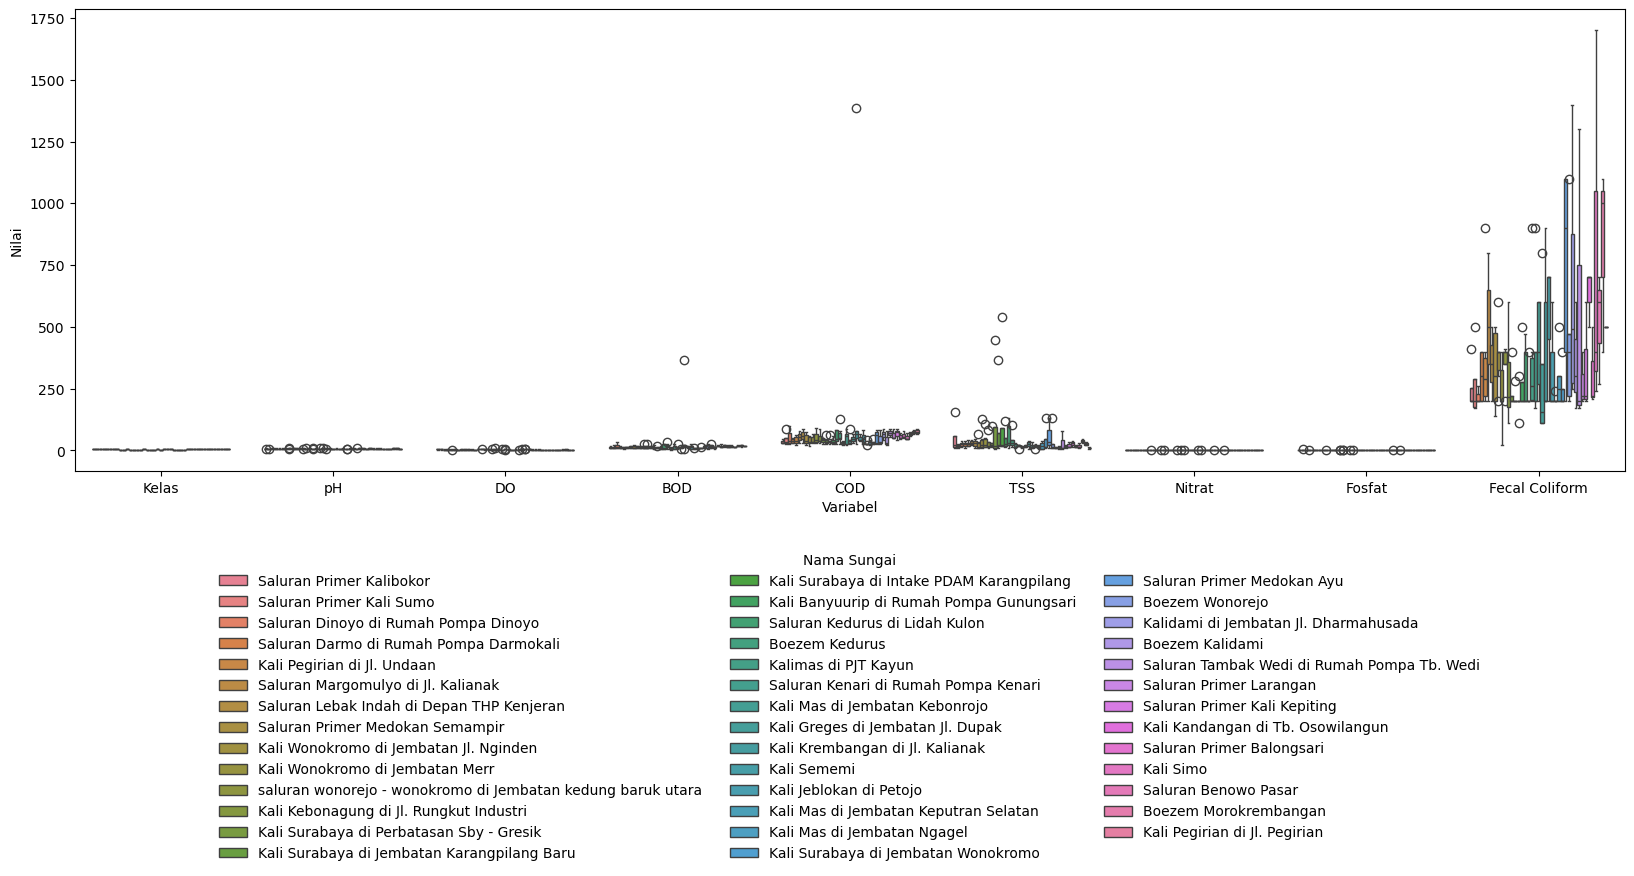

In [25]:
parameterS2=KualitasAir.melt(id_vars='Nama Sungai',var_name='Variabel',value_name='Nilai')
plt.figure(figsize=(20,6))
sns.boxplot(x='Variabel',y='Nilai',hue='Nama Sungai', data=parameterS2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title="Nama Sungai", frameon=False)
plt.show()

In [48]:
KualitasAirG = KualitasAir.groupby(['Nama Sungai','Kelas']).agg({
    'pH':'mean',
    'DO':'mean',
    'BOD':'median',
    'COD':'median',
    'TSS':'median',
    'Nitrat':'mean',
    'Fosfat' :'mean',
    'Fecal Coliform':'median'}).reset_index()
KualitasAirG[['pH', 'DO', 'Nitrat', 'Fosfat']] = KualitasAirG[['pH', 'DO', 'Nitrat', 'Fosfat']].round(2)
KualitasAirG

,Nama Sungai,Kelas,pH,DO,BOD,COD,TSS,Nitrat,Fosfat,Fecal Coliform
0,Boezem Kalidami,4,7.92,2.57,9.0,29.00,10.00,0.12,0.33,300.0
1,Boezem Kedurus,3,7.78,4.27,15.0,52.00,32.00,0.55,0.29,200.0
2,Boezem Morokrembangan,4,7.66,2.77,21.0,75.00,24.00,0.13,0.57,1000.0
3,Boezem Wonorejo,4,7.60,2.72,10.0,33.10,13.00,0.39,0.29,400.0
4,Kali Banyuurip di Rumah Pompa Gunungsari,4,7.63,3.90,10.0,32.45,25.00,0.55,0.22,200.0
5,Kali Greges di Jembatan Jl. Dupak,4,7.49,3.12,12.0,45.10,18.00,0.02,0.45,155.0
6,Kali Jeblokan di Petojo,3,7.59,3.20,15.0,45.00,18.80,0.23,0.36,200.0
7,Kali Kandangan di Tb. Osowilangun,4,7.49,3.13,15.0,51.00,31.00,0.15,0.55,700.0
8,Kali Kebonagung di Jl. Rungkut Industri,3,7.73,3.12,12.0,39.30,23.50,0.12,0.64,215.0
9,Kali Krembangan di Jl. Kalianak,4,7.45,2.78,18.0,68.00,28.00,0.20,0.47,200.0


In [29]:
KualitasAirG.to_excel('Kualitas Air 2024 Clean.xlsx', index=False)

In [49]:
KualitasAirG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Sungai     41 non-null     object 
 1   Kelas           41 non-null     int64  
 2   pH              41 non-null     float64
 3   DO              41 non-null     float64
 4   BOD             41 non-null     float64
 5   COD             41 non-null     float64
 6   TSS             41 non-null     float64
 7   Nitrat          41 non-null     float64
 8   Fosfat          41 non-null     float64
 9   Fecal Coliform  41 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 3.3+ KB


# Clustering

In [38]:
import gower
from sklearn_extra.cluster import KMedoids

In [50]:
indikator = KualitasAirG.iloc[:,2:9]
indikator

,pH,DO,BOD,COD,TSS,Nitrat,Fosfat
0,7.92,2.57,9.0,29.00,10.00,0.12,0.33
1,7.78,4.27,15.0,52.00,32.00,0.55,0.29
2,7.66,2.77,21.0,75.00,24.00,0.13,0.57
3,7.60,2.72,10.0,33.10,13.00,0.39,0.29
4,7.63,3.90,10.0,32.45,25.00,0.55,0.22
5,7.49,3.12,12.0,45.10,18.00,0.02,0.45
6,7.59,3.20,15.0,45.00,18.80,0.23,0.36
7,7.49,3.13,15.0,51.00,31.00,0.15,0.55
8,7.73,3.12,12.0,39.30,23.50,0.12,0.64
9,7.45,2.78,18.0,68.00,28.00,0.20,0.47


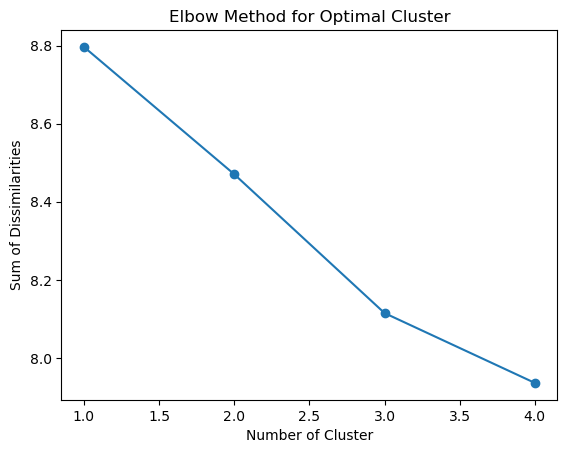

In [51]:
matriks = gower.gower_matrix(indikator)
sse=[]
K=range(1,5)
for k in K :
    kmedo = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmedo.fit(matriks)
    sse.append(kmedo.inertia_)
plt.plot(K,sse, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Dissimilarities')
plt.title('Elbow Method for Optimal Cluster')
plt.show()

In [52]:
from sklearn.metrics import davies_bouldin_score,silhouette_score
kmedo=KMedoids(n_clusters=3, random_state=42)
kmedo.fit(matriks)
kmedo2=KMedoids(n_clusters=2,random_state=42)
kmedo2.fit(matriks)
kmedo3=KMedoids(n_clusters=4,random_state=42)
kmedo3.fit(matriks)
silhouette_avg=silhouette_score(matriks, kmedo.labels_)
silhouette_avg2=silhouette_score(matriks, kmedo2.labels_)
silhouette_avg3=silhouette_score(matriks, kmedo3.labels_)
db_index=davies_bouldin_score(matriks,kmedo.labels_)
db_index2=davies_bouldin_score(matriks,kmedo2.labels_)
db_index3=davies_bouldin_score(matriks,kmedo3.labels_)
Kualitas_Cluster={
    'Banyak Cluster':('3','2','4'),
    'Silhouette Score':(silhouette_avg,silhouette_avg2,silhouette_avg3),
    'Davies Bouldin':(db_index,db_index2,db_index3)
}
pd.DataFrame(Kualitas_Cluster)

,Banyak Cluster,Silhouette Score,Davies Bouldin
0,3,0.306613,1.127511
1,2,0.380931,1.014375
2,4,0.169705,1.565809


In [53]:
KualitasAirG['Cluster']=kmedo2.labels_+1
KualitasAirG

,Nama Sungai,Kelas,pH,DO,BOD,COD,TSS,Nitrat,Fosfat,Fecal Coliform,Cluster
0,Boezem Kalidami,4,7.92,2.57,9.0,29.00,10.00,0.12,0.33,300.0,1
1,Boezem Kedurus,3,7.78,4.27,15.0,52.00,32.00,0.55,0.29,200.0,2
2,Boezem Morokrembangan,4,7.66,2.77,21.0,75.00,24.00,0.13,0.57,1000.0,1
3,Boezem Wonorejo,4,7.60,2.72,10.0,33.10,13.00,0.39,0.29,400.0,2
4,Kali Banyuurip di Rumah Pompa Gunungsari,4,7.63,3.90,10.0,32.45,25.00,0.55,0.22,200.0,2
5,Kali Greges di Jembatan Jl. Dupak,4,7.49,3.12,12.0,45.10,18.00,0.02,0.45,155.0,1
6,Kali Jeblokan di Petojo,3,7.59,3.20,15.0,45.00,18.80,0.23,0.36,200.0,1
7,Kali Kandangan di Tb. Osowilangun,4,7.49,3.13,15.0,51.00,31.00,0.15,0.55,700.0,1
8,Kali Kebonagung di Jl. Rungkut Industri,3,7.73,3.12,12.0,39.30,23.50,0.12,0.64,215.0,1
9,Kali Krembangan di Jl. Kalianak,4,7.45,2.78,18.0,68.00,28.00,0.20,0.47,200.0,1


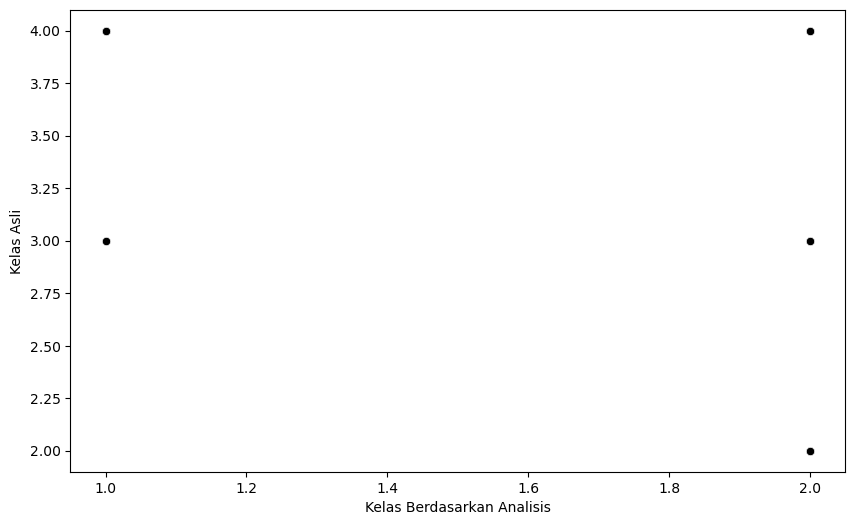

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cluster',y='Kelas',data=KualitasAirG ,color='black')
plt.xlabel('Kelas Berdasarkan Analisis')
plt.ylabel('Kelas Asli')
plt.show()

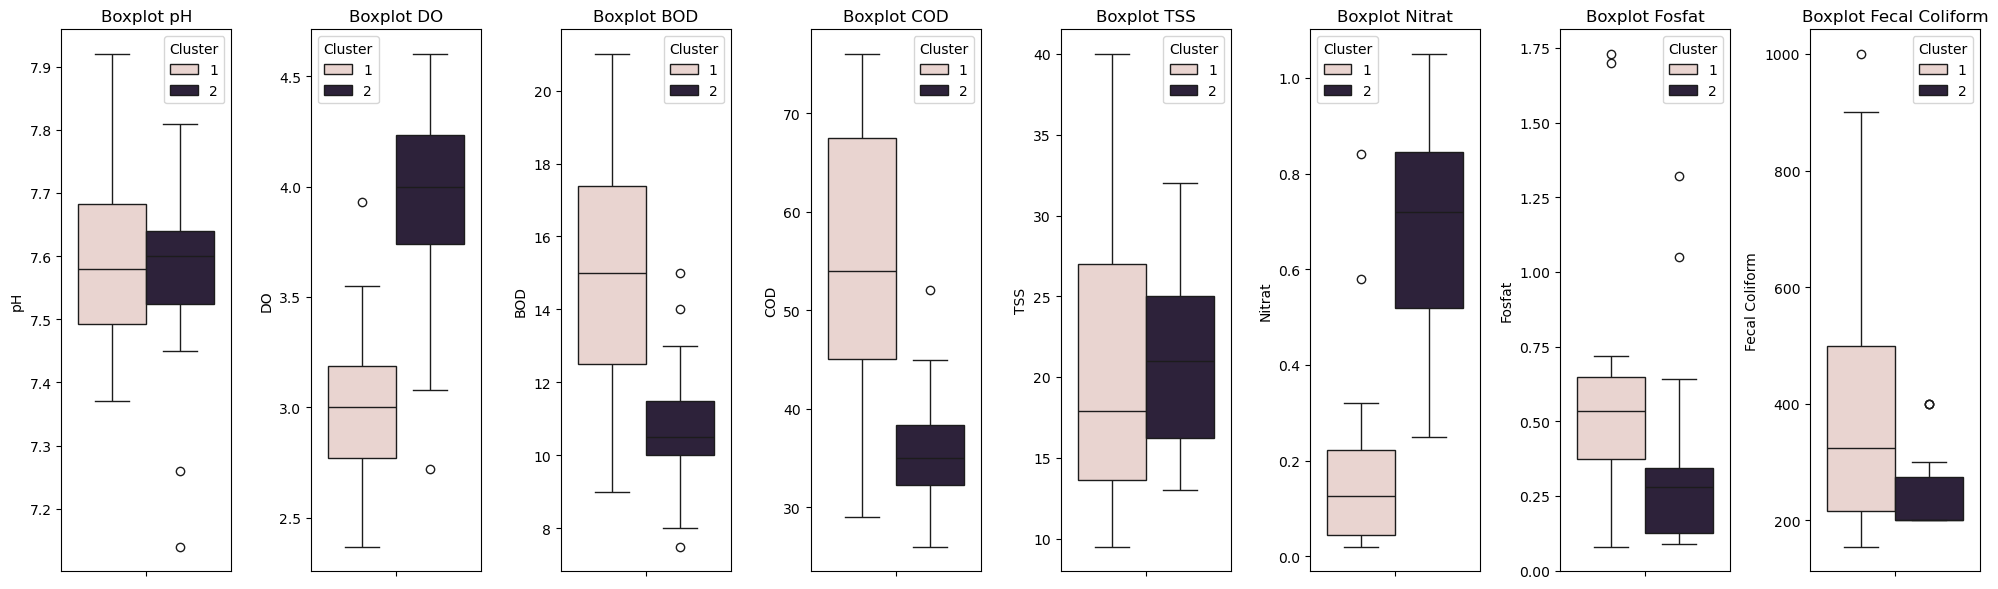

In [72]:
Karakteristik = KualitasAirG.iloc[:,2:11]
fig, axes = plt.subplots(1,len(Karakteristik.columns)-1, figsize=(20,6))
for i, column in enumerate(Karakteristik.columns[:-1]):
    sns.boxplot(data=Karakteristik, y=column, hue='Cluster', ax=axes[i])
    axes[i].set_title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

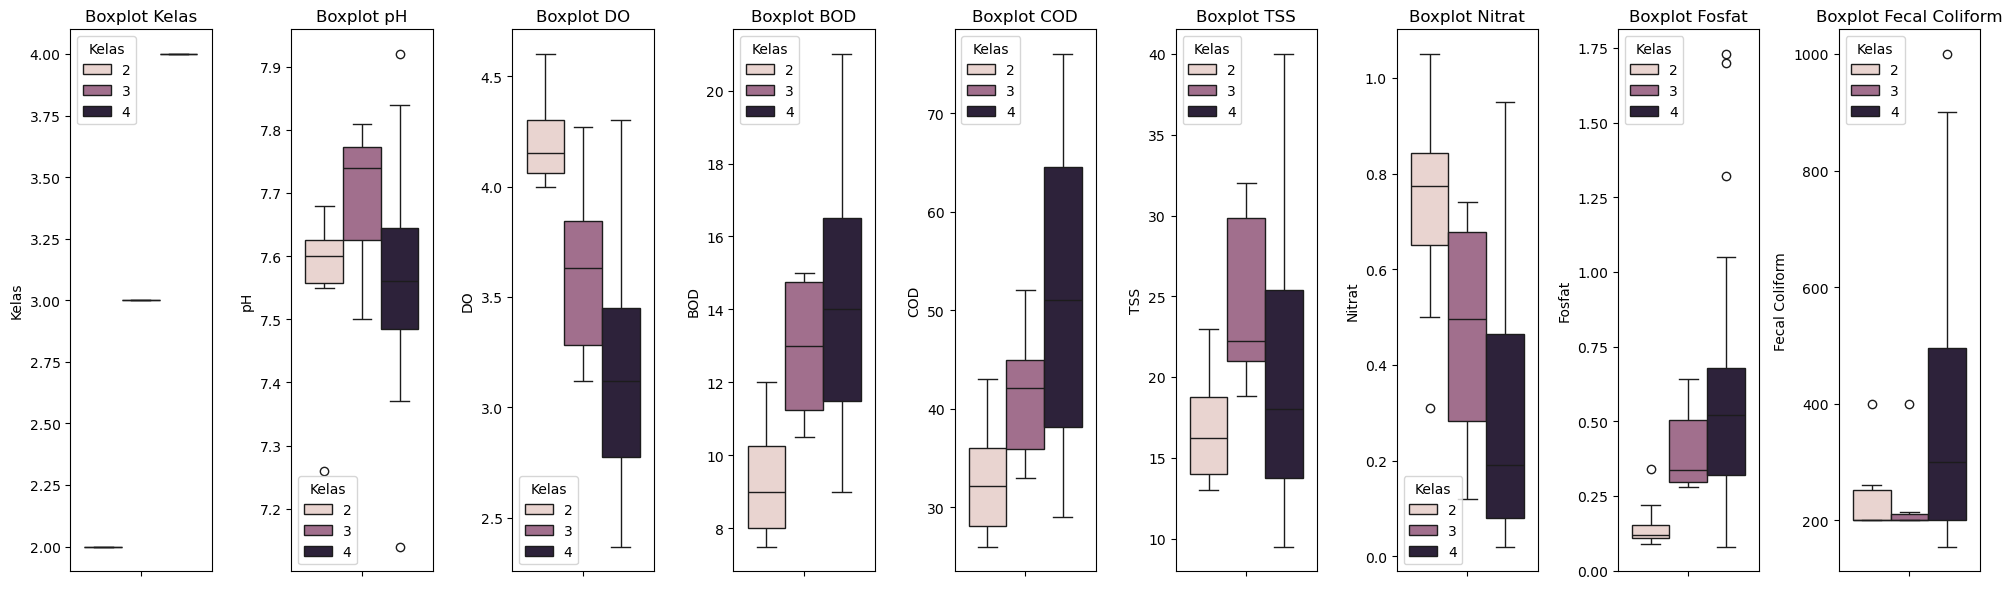

In [74]:
Karakteristik1 = KualitasAirG.iloc[:,1:10]
fig, axes = plt.subplots(1,len(Karakteristik1.columns), figsize=(20,6))
for i, column in enumerate(Karakteristik1.columns):
    sns.boxplot(data=Karakteristik1, y=column, hue='Kelas', ax=axes[i])
    axes[i].set_title(f'Boxplot {column}')
plt.tight_layout()
plt.show()